In [1]:
import json

file = open('synthetic_dataset_with_time.txt', 'r')
text = file.read()
data = json.loads(text)


In [2]:
import emip_toolkit as EMTK

# find areas of interest (AOIs) once again
image_path = "./"
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")


# add tokens to AOIs 
file_path = "./"
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

import correction


# find the y coordinate of each line in the text
line_ys = correction.find_lines_Y(aoi)

/workspaces/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/workspaces/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/workspaces/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/workspaces/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/workspaces/CS421-project1/emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecate

In [4]:
import correction

In [5]:
import numpy as np
import drift_algorithms as algo
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
import statistics

def mean_error_group(results):
    new_list = []
    
    for result in results:
        new_list.append(statistics.mean(result))
        
    return new_list

In [7]:
attach_results = [[],[],[],[],[],[],[],[],[],[],[]]
chain_results = [[],[],[],[],[],[],[],[],[],[],[]]
regress_results = [[],[],[],[],[],[],[],[],[],[],[]]
warp_results = [[],[],[],[],[],[],[],[],[],[],[]]
cluster_results = [[],[],[],[],[],[],[],[],[],[],[]]
compare_results = [[],[],[],[],[],[],[],[],[],[],[]]
merge_results = [[],[],[],[],[],[],[],[],[],[],[]]
split_results = [[],[],[],[],[],[],[],[],[],[],[]]
segment_results = [[],[],[],[],[],[],[],[],[],[],[]]
stretch_results = [[],[],[],[],[],[],[],[],[],[],[]]


word_centers = correction.find_word_centers(aoi)
word_centers = np.array(word_centers.copy(), dtype=int)
lines = correction.find_lines_Y(aoi)

duration_word_centers = correction.find_word_centers_and_duration(aois_with_tokens)
duration_word_centers = np.array(duration_word_centers.copy(), dtype=int)

# MAKE SURE YOU RUN THIS 100 TIMES, NOT JUST ONE!!!
for robot_index in tqdm(range(100)):
    
    for error_probability in range(0, 11):
        # generate error
        lines_map = correction.map_lines(line_ys, data['robot' + str(robot_index)].copy())
        error_test = correction.error_within_line_regress(error_probability/10,error_probability/10, lines_map)

        # attach correction
        np_array = np.array(error_test.copy())
        attach_correction = algo.attach(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), attach_correction)
        attach_results[error_probability].append(percentage)


        # chain correction
        np_array = np.array(error_test.copy())
        chain_correction = algo.chain(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), chain_correction)
        chain_results[error_probability].append(percentage)

        # cluster correction
        np_array = np.array(error_test.copy())
        cluster_correction = algo.cluster(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), cluster_correction)
        cluster_results[error_probability].append(percentage)

        # compare correction
        np_array = np.array(error_test.copy())
        compare_correction = algo.compare(np_array, word_centers)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), compare_correction)
        compare_results[error_probability].append(percentage)

        # merge correction
        np_array = np.array(error_test.copy())
        merge_correction = algo.merge(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), merge_correction)
        merge_results[error_probability].append(percentage)

        
        # regress correction
        np_array = np.array(error_test.copy())
        regress_correction = algo.regress(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), regress_correction)
        regress_results[error_probability].append(percentage)

        # segment correction
        np_array = np.array(error_test.copy())
        segment_correction = algo.segment(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), segment_correction)
        segment_results[error_probability].append(percentage)

        # split correction
        np_array = np.array(error_test.copy())
        split_correction = algo.split(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), split_correction)
        split_results[error_probability].append(percentage)

        # strecth correction
        np_array = np.array(error_test.copy())
        stretch_correction = algo.stretch(np_array, line_ys)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), stretch_correction)
        stretch_results[error_probability].append(percentage)

        # warp correction
        np_array = np.array(error_test.copy(), dtype=int)
        durations = np.delete(np_array, 0, 1)
        durations = np.delete(durations, 0, 1)
        np_array = np.delete(np_array, 2, 1)
        
        warp_correction = algo.warp(np_array, word_centers)
        percentage, match_list = correction.correction_quality(aoi, data['robot' + str(robot_index)].copy(), warp_correction)
        warp_results[error_probability].append(percentage)

    


  9%|▉         | 9/100 [12:11<2:08:30, 84.73s/it]/tmp/ipykernel_2110/551765519.py:55: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 13%|█▎        | 13/100 [18:02<2:08:08, 88.37s/it]/tmp/ipykernel_2110/551765519.py:55: RankWarning: Polyfit may be poorly conditioned
  merge_correction = algo.merge(np_array, line_ys)
 39%|███▉      | 39/100 [57:09<1:35:34, 94.00s/it] Bad pipe message: %s [b'W\xd5\xf4\xde\xe4h%\x03hQ\xaax}\xff\xfe~V\x80 O\xc3h\xe9\xa2\xbdlX\xed7\xeb\xb6Qn\x8e\xc3h\x05T2\x1cF\xbb\x84o\xb6\xee0\x1e\xc6uN\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00']
Bad pipe message: %s [b'\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18']
Bad pipe message: %s [b'J\x88>\xba\x03!6\xcc\x8e,\xad>\xe51\x99\x15\x83\x82\x00\x00\xa2\xc0\x14\xc0\n\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00:\x00\x89\xc0\x0f\xc0\x05\x005\x00\x84\xc0\x13\xc

In [7]:
mean_attach_results = mean_error_group(attach_results)
mean_chain_results = mean_error_group(chain_results)
mean_regress_results = mean_error_group(regress_results)
mean_warp_results = mean_error_group(warp_results)
mean_cluster_results = mean_error_group(cluster_results)
mean_compare_results = mean_error_group(compare_results)
mean_merge_results = mean_error_group(merge_results)
mean_split_results = mean_error_group(split_results)
mean_segment_results = mean_error_group(segment_results)
mean_stretch_results = mean_error_group(stretch_results)


In [8]:
print("mean attach:", statistics.mean(mean_attach_results))
print("mean chain:", statistics.mean(mean_chain_results))
print("mean regress:", statistics.mean(mean_regress_results))
print("mean warp:", statistics.mean(mean_warp_results))
print("mean cluster:", statistics.mean(mean_cluster_results))
print("mean compare:", statistics.mean(mean_compare_results))
print("mean merge:", statistics.mean(mean_merge_results))
print("mean split:", statistics.mean(mean_split_results))
print("mean segment:", statistics.mean(mean_segment_results))
print("mean stretch:", statistics.mean(mean_stretch_results))

mean attach: 0.5918367346938775
mean chain: 0.5918367346938775
mean regress: 0.5918367346938775
mean warp: 0.588126159554731
mean cluster: 0.5918367346938775
mean compare: 0.37291280148423006
mean merge: 0.5102040816326531
mean split: 0.588126159554731
mean segment: 0.4675324675324675
mean stretch: 0.5918367346938775


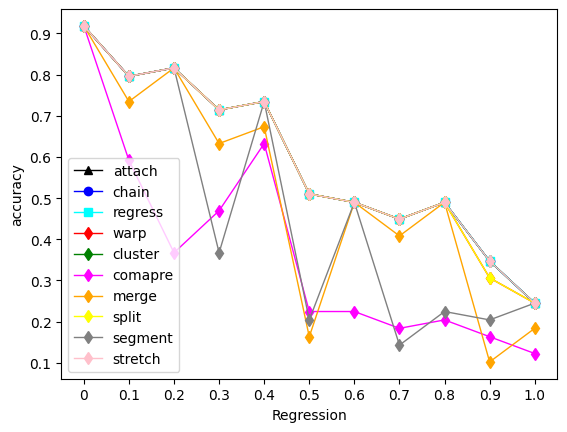

Bad pipe message: %s [b'\xa0<\xd8\xdf\xd0\x8f\xf6[\xb4\xc2B\x868\xe3Z\x16L\xf3 \x0c-\xe9\xee,\x07\xa2\xe5\xef']
Bad pipe message: %s [b'\xbd}\x8e.\x06!\xd0\xa1\x87\xdd\xfc\xaf\xa5\xa6\xc9$\xef\xff\xa3\xf71\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07']
Bad pipe message: %s [b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'\x05\x01\x06', b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 C\xd8O\x9b>\x8581\xcc\xdcHA+\xf0|\x89@sf\xbc\xd8\xb3']
Bad pipe message: %s [b"\x0e\xe3\x91!W\x8d}\xd12Q^\xf2~\x7f\x98|\xf5\xda\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xa

In [10]:
plt.plot(mean_attach_results, color='Black', linewidth=1, marker='^')
plt.plot(mean_chain_results, color='Blue', linewidth=1, marker='o')
plt.plot(mean_regress_results, color='Aqua', linewidth=1, marker='s')
plt.plot(mean_warp_results, color='Red', linewidth=1, marker='d')
plt.plot(mean_cluster_results, color='Green', linewidth=1, marker='d')
plt.plot(mean_compare_results, color='Magenta', linewidth=1, marker='d')
plt.plot(mean_merge_results, color='Orange', linewidth=1, marker='d')
plt.plot(mean_split_results, color='Yellow', linewidth=1, marker='d')
plt.plot(mean_segment_results, color='Grey', linewidth=1, marker='d')
plt.plot(mean_stretch_results, color='Pink', linewidth=1, marker='d')

plt.legend(['attach', 'chain', 'regress', 'warp', 'cluster', 'comapre', 'merge', 'split', 'segment', 'stretch'])
plt.ylabel('accuracy')
plt.xlabel('Regression')

x_ticks_labels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
plt.xticks(range(0, 11), x_ticks_labels)
#plt.savefig("noise_comparison.png")
plt.show()